In [13]:
#pip install spotlight

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from spotlight.datasets.movielens import get_movielens_dataset

# Load the MovieLens 100K dataset
movielens_dataset = get_movielens_dataset(variant='100K')

# Transform the Movielens 100K dataset into a pandas dataframe
movielens = pd.DataFrame({key: vars(movielens_dataset)[key] for key in list(vars(movielens_dataset).keys())[2:6]})

# Rename column item_ids
movielens = movielens.rename(columns={'item_ids': 'movie_ids'})

In [16]:
movielens.head()

,user_ids,movie_ids,ratings,timestamps
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [18]:
movielens['user_ids'].unique().size

943

In [19]:
movielens['movie_ids'].unique().size

1682

In [20]:
np.sort(movielens['ratings'].unique())

array([1., 2., 3., 4., 5.], dtype=float32)

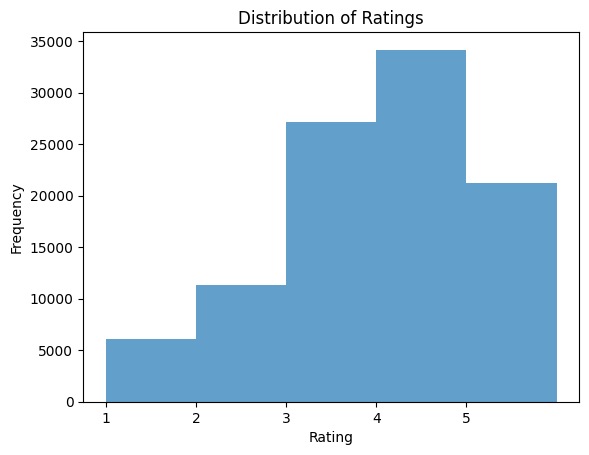

In [21]:
plt.hist(movielens['ratings'], bins=5, range=(1, 6), alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

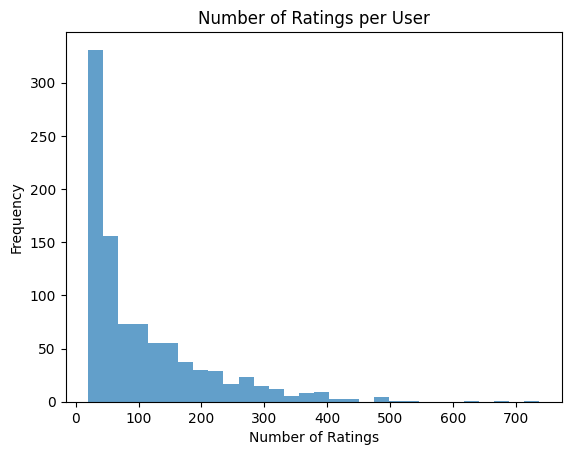

In [64]:
# Analyze the number of ratings per user

user_counts = np.array(movielens['user_ids'].value_counts())

plt.hist(user_counts, bins=30, alpha=0.7)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [110]:
counts1, _ = np.histogram(user_counts, bins=user_counts.max())

In [116]:
n = 160
counts1[:n].sum() / counts1.sum()

0.8059384941675504

The 80% of the users have rated less than 160 films.

In [133]:
# Mean number of ratings by each user

user_counts.mean()

106.04453870625663

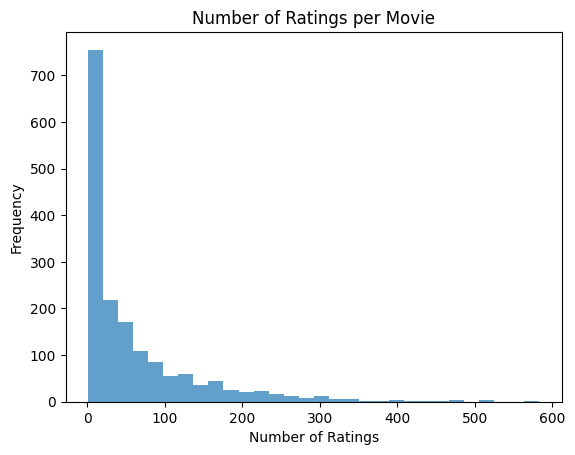

In [104]:
# Analyze the number of ratings per movie

movie_counts = np.array(movielens['movie_ids'].value_counts())

plt.hist(counts, bins=30, alpha=0.7)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [201]:
counts2, _ = np.histogram(movie_counts, bins=movie_counts.max())

In [119]:
n = 100
counts2[:n].sum() / counts2.sum()

0.8014268727705113

The 80% of the movies have been rated less than 100 times.

In [132]:
# Mean number of ratings that each movie has

movie_counts.mean()

59.45303210463734